In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras, os
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
from IPython.display import display, Image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/content/drive/MyDrive/Colab Notebooks/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [ ]:
trdata = ImageDataGenerator()
train_it = trdata.flow_from_directory('/content/dataset_dogs_vs_cats/train/', target_size=(224, 224))
tstdata = ImageDataGenerator()
test_it = tstdata.flow_from_directory('/content/dataset_dogs_vs_cats/test/', target_size=(224, 224))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights = 'imagenet',include_top = True)

In [ ]:
vggmodel.summary()

In [ ]:
for layers in (vggmodel.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
X = vggmodel.layers[-2].output
predictions = Dense(2, activation = "softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [ ]:
model_final.compile(loss = 'categorical_crossentropy',optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9),metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/vgg16_1.h5", monitor ='val_accuracy', verbose = 1, save_best_only = True,save_weights_only = False,mode = 'auto')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0 , patience = 40, verbose = 1, mode = 'auto')



hist = model_final.fit(train_it,steps_per_epoch = 2 , epochs = 100, validation_data = test_it, validation_steps = 1, callbacks = [checkpoint,early])

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.6094 
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 74s 53s/step - loss: 0.9554 - accuracy: 0.6094 - val_loss: 0.7502 - val_accuracy: 0.6875
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.8362 - accuracy: 0.6406 
Epoch 2: val_accuracy improved from 0.68750 to 0.78125, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16_1.h5
2/2 [==============================] - 85s 64s/step - loss: 0.8362 - accuracy: 0.6406 - val_loss: 0.3944 - val_accuracy: 0.7812
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.3288 - accuracy: 0.8594 
Epoch 3: val_accuracy improved from 0.78125 to 0.90625, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16_1.h5
2/2 [==============================] - 81s 58s/step - loss: 0.3288 - accuracy: 0.8594 - val_loss: 0.1841 - val_accuracy: 0.9062
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.9219 
Epoch 4: val_accuracy did not improve from 0.90625
2/2 [==============================] - 

In [ ]:
model_final.save_weights('vgg16_1.h5')

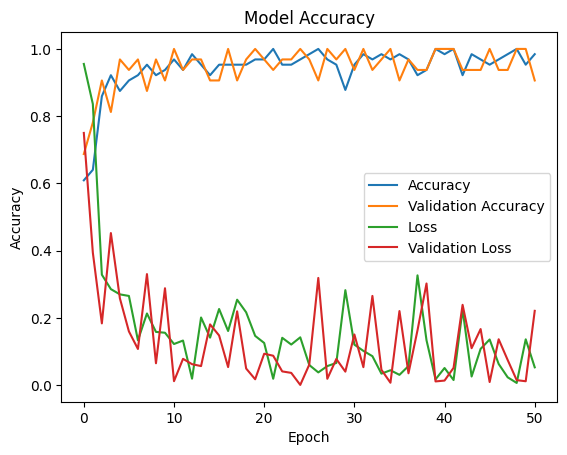

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
#load model for testing /predict
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model


model = load_model('/content/drive/MyDrive/Colab Notebooks/vgg16_1.h5')


In [ ]:
_, acc = model.evaluate(test_it, steps=None, verbose=0)
print('> %.3f' % (acc * 100.0))

> 94.637


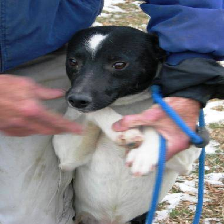

1/1 [==============================] - 2s 2s/step
dog


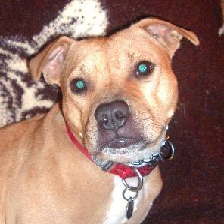

1/1 [==============================] - 1s 1s/step
dog


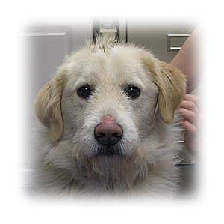

1/1 [==============================] - 1s 1s/step
dog


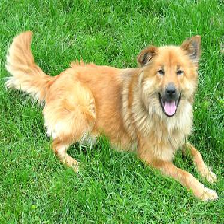

1/1 [==============================] - 1s 1s/step
dog


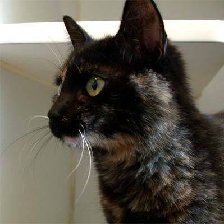

1/1 [==============================] - 1s 1s/step
cat


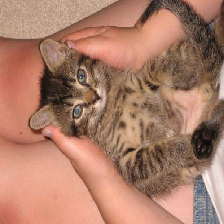

1/1 [==============================] - 1s 1s/step
cat


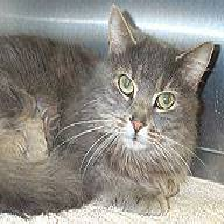

1/1 [==============================] - 3s 3s/step
cat


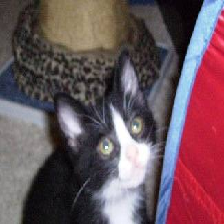

1/1 [==============================] - 1s 1s/step
cat


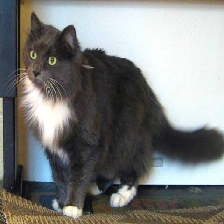

1/1 [==============================] - 1s 1s/step
cat


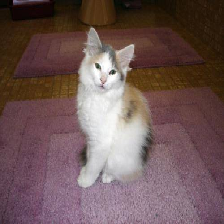

1/1 [==============================] - 1s 1s/step
cat


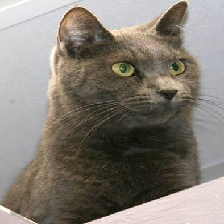

1/1 [==============================] - 1s 1s/step
cat


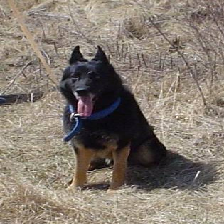

1/1 [==============================] - 1s 1s/step
dog


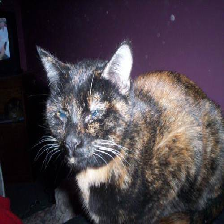

1/1 [==============================] - 1s 1s/step
cat


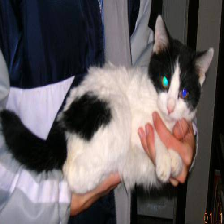

1/1 [==============================] - 1s 1s/step
cat


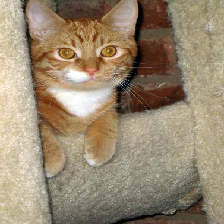

1/1 [==============================] - 1s 1s/step
cat


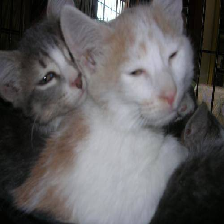

1/1 [==============================] - 2s 2s/step
cat


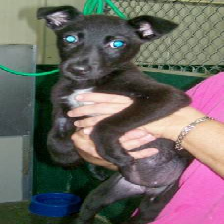

1/1 [==============================] - 1s 1s/step
dog


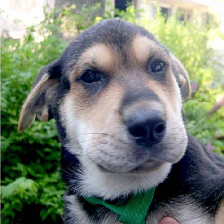

1/1 [==============================] - 1s 1s/step
dog


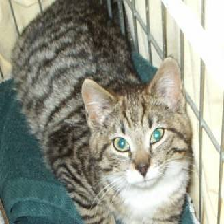

1/1 [==============================] - 1s 1s/step
cat


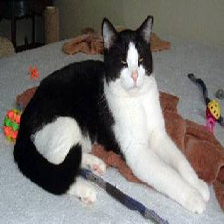

1/1 [==============================] - 1s 1s/step
cat


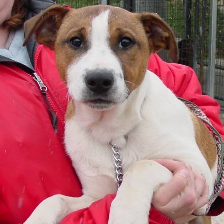

1/1 [==============================] - 1s 1s/step
dog


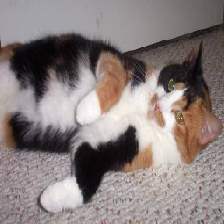

1/1 [==============================] - 1s 1s/step
cat


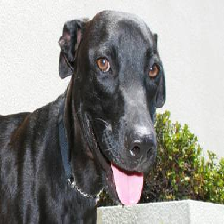

1/1 [==============================] - 1s 1s/step
dog


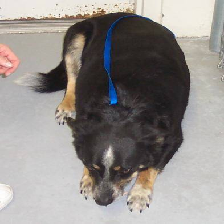

1/1 [==============================] - 1s 1s/step
dog


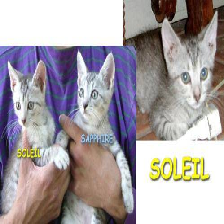

1/1 [==============================] - 2s 2s/step
cat


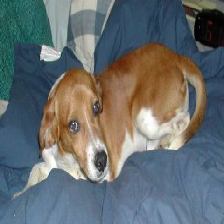

1/1 [==============================] - 1s 1s/step
dog


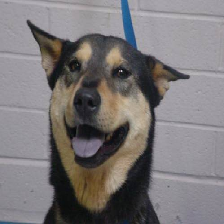

1/1 [==============================] - 1s 1s/step
dog


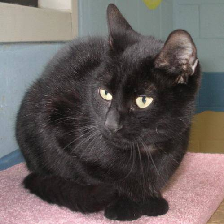

1/1 [==============================] - 1s 1s/step
cat


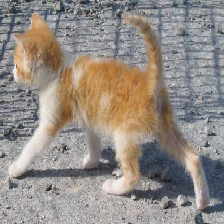

1/1 [==============================] - 1s 1s/step
cat


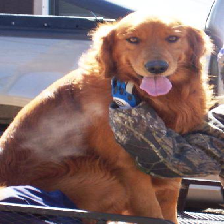

1/1 [==============================] - 1s 1s/step
dog


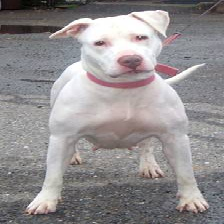

1/1 [==============================] - 1s 815ms/step
dog


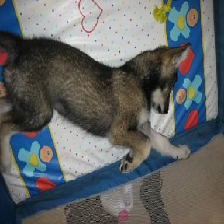

1/1 [==============================] - 1s 1s/step
cat


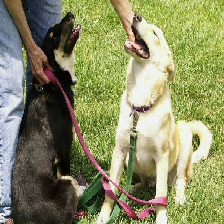

1/1 [==============================] - 2s 2s/step
dog


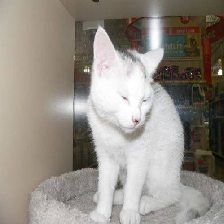

1/1 [==============================] - 1s 1s/step
cat


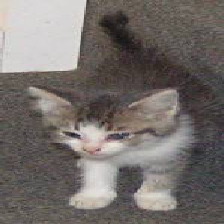

1/1 [==============================] - 1s 1s/step
cat


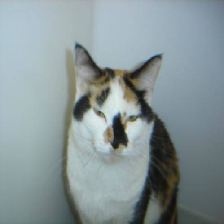

1/1 [==============================] - 1s 1s/step
cat


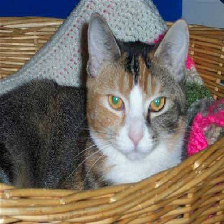

1/1 [==============================] - 1s 1s/step
cat


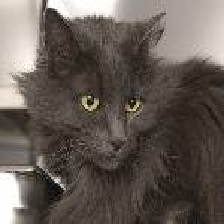

1/1 [==============================] - 1s 1s/step
cat


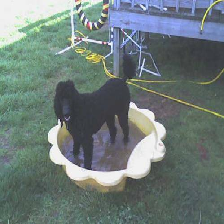

1/1 [==============================] - 1s 1s/step
dog


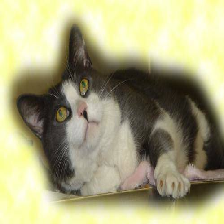

1/1 [==============================] - 1s 1s/step
cat


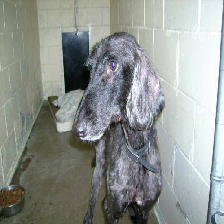

1/1 [==============================] - 1s 1s/step
dog


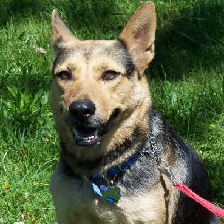

1/1 [==============================] - 1s 1s/step
dog


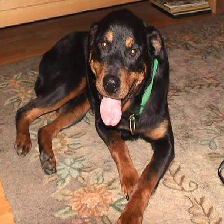

1/1 [==============================] - 1s 1s/step
dog


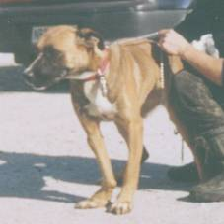

1/1 [==============================] - 1s 1s/step
dog


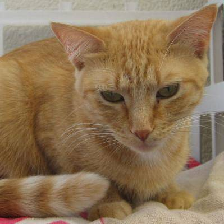

1/1 [==============================] - 1s 1s/step
cat


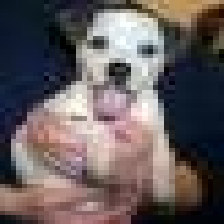

1/1 [==============================] - 1s 1s/step
dog


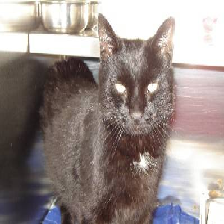

1/1 [==============================] - 1s 1s/step
cat


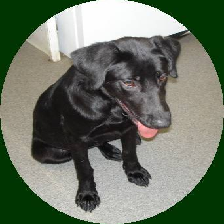

1/1 [==============================] - 1s 1s/step
dog


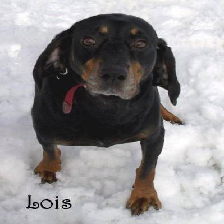

1/1 [==============================] - 2s 2s/step
dog


In [ ]:
from io import BytesIO
import PIL
from IPython.display import display, Image
import tensorflow as tf


def display_img_array(ima):
  im = PIL.Image.fromarray(ima)
  bio = BytesIO()
  im.save(bio, format='png')
  display(Image(bio.getvalue(), format='png'))


for num in range(1, 50, 1):
  path = '/content/drive/MyDrive/Colab Notebooks/test1/' + str(num) + ".jpg"
  img = tf.keras.utils.load_img(path, target_size=(224, 224))
  img = np.asarray(img)
  display_img_array(img)
  img = np.expand_dims(img, axis= 0)
  output = saved_model.predict(img)
  if output[0][0] > output[0][1]:
    print("cat")
  else:
    print("dog")

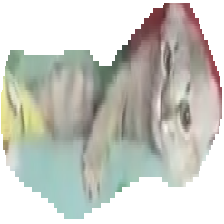

1/1 [==============================] - 1s 611ms/step
cat


In [ ]:
img = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/image (1).png', target_size=(224, 224))
img = np.asarray(img)
display_img_array(img)
img = np.expand_dims(img, axis= 0)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
  print("cat")
else:
  print("dog")

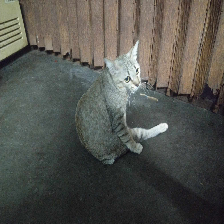

1/1 [==============================] - 1s 611ms/step
cat


In [ ]:
img = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/422338537_925619352566278_8008818358639428018_n.jpg', target_size=(224, 224))
img = np.asarray(img)
display_img_array(img)
img = np.expand_dims(img, axis= 0)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
  print("cat")
else:
  print("dog")